Los algoritmos de Prewitt, Sobel y Laplaciano son operadores de detección de bordes utilizados en procesamiento de imágenes para resaltar las regiones donde hay cambios significativos de intensidad. Cada uno de estos algoritmos se basa en la aplicación de convoluciones para calcular gradientes y derivadas en direcciones específicas. A continuación, explicaré brevemente cada uno y proporcionaré una comparación:

### 1. Operador Prewitt:

El operador Prewitt utiliza dos máscaras convolucionales separadas para calcular las derivadas parciales en las direcciones horizontal y vertical. Estas máscaras son:

```
PrewittX = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
PrewittY = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
```

El gradiente aproximado en la dirección x se obtiene convolucionando la imagen con `PrewittX`, y el gradiente en la dirección y se obtiene convolucionando la imagen con `PrewittY`. La magnitud del gradiente se calcula como la raíz cuadrada de la suma de los cuadrados de estas derivadas parciales.

### 2. Operador Sobel:

El operador Sobel es similar al Prewitt, pero utiliza máscaras ligeramente diferentes:

```
SobelX = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
SobelY = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
```

Al igual que Prewitt, el gradiente en la dirección x se obtiene convolucionando la imagen con `SobelX`, y el gradiente en la dirección y se obtiene convolucionando la imagen con `SobelY`. La magnitud del gradiente se calcula de manera similar.

### 3. Operador Laplaciano:

El operador Laplaciano se utiliza para resaltar regiones donde hay cambios bruscos de intensidad en todas las direcciones. Utiliza la siguiente máscara:

```
Laplacian = [[0, 1, 0], [1, -4, 1], [0, 1, 0]]
```

La imagen original se convoluciona con esta máscara para obtener el Laplaciano, que resalta las regiones donde la intensidad cambia abruptamente.

### Comparación:

- **Sensibilidad a Ruido:**
  - Prewitt y Sobel son más sensibles al ruido debido a la elección de máscaras más simples.
  - El Laplaciano puede acentuar el ruido en las regiones de alta frecuencia.

- **Detección de Bordes:**
  - Prewitt y Sobel son eficaces en la detección de bordes verticales y horizontales.
  - Laplaciano destaca los cambios de intensidad en todas las direcciones, incluyendo bordes diagonales.

- **Suavizado:**
  - Prewitt y Sobel tienden a suavizar más la imagen, ya que utilizan máscaras que se aproximan a las derivadas.

- **Elección del Operador:**
  - La elección entre Prewitt, Sobel y Laplaciano depende de la aplicación específica y la naturaleza de la imagen.

En general, la elección del operador depende del contexto y del tipo de características que se deseen resaltar en la imagen. Prewitt y Sobel son comúnmente utilizados en aplicaciones donde se buscan bordes más nítidos en direcciones específicas, mientras que el Laplaciano es más adecuado para resaltar cambios abruptos en todas las direcciones.

## Ejercicio 1
Implementa los detectores de línea siguientes usando código en Python (es decir, sin usar librerías de OpenCV): Prewitt, Sobel y Laplaciano. Investiga la complejidad algoritmica de estos, ¿cual es más eficiente?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
def convolve(image, kernel):
    # Get image dimensions
    height, width = image.shape

    # Get kernel dimensions
    k_height, k_width = kernel.shape

    # Calculate padding size using floor division to get integer values
    pad_height = k_height // 2
    pad_width = k_width // 2

    # Create padded image with a constant value of 0
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')

    # Create output image
    output_image = np.zeros_like(image)

    # Convolve the image with the kernel
    for i in range(height):
        for j in range(width):
            output_image[i, j] = np.sum(padded_image[i:i+k_height, j:j+k_width] * kernel)

    return output_image

def prewitt(image):
    # Define Prewitt kernels
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    # Convolve the image with the Prewitt kernels
    gradient_x = convolve(image, kernel_x)
    gradient_y = convolve(image, kernel_y)

    # Calculate magnitude and direction
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x)

    return magnitude, direction

def sobel(image):
    # Define Sobel kernels
    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # Convolve the image with the Sobel kernels
    gradient_x = convolve(image, kernel_x)
    gradient_y = convolve(image, kernel_y)

    # Calculate magnitude and direction
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x)

    return magnitude, direction

def laplacian(image):
    # Define Laplacian kernel
    kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    # Convolve the image with the Laplacian kernel
    output_image = convolve(image, kernel)

    return output_image

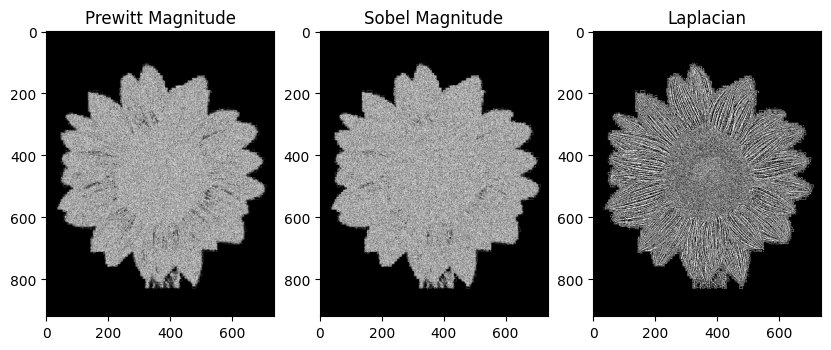

In [8]:
# Load the input image
image = Image.open('data/sunflower.jpeg')
image = image.convert('L')  # Convert image to grayscale to simplify processing

# Convert image to numpy array
image_array = np.array(image)

# Apply the Prewitt algorithm
prewitt_magnitude, prewitt_direction = prewitt(image_array)

# Apply the Sobel algorithm
sobel_magnitude, sobel_direction = sobel(image_array)

# Apply the Laplacian algorithm
laplacian_output = laplacian(image_array)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(131)
plt.imshow(prewitt_magnitude, cmap='gray')
plt.title('Prewitt Magnitude')

plt.subplot(132)
plt.imshow(sobel_magnitude, cmap='gray')
plt.title('Sobel Magnitude')

plt.subplot(133)
plt.imshow(laplacian_output, cmap='gray')
plt.title('Laplacian')

plt.show()


En cuanto a la complejidad algorítmica:

    Prewitt y Sobel:
        Complejidad temporal: O(M * N), donde M y N son las dimensiones de la imagen.
        Ambos utilizan operaciones de convolución, que tienen complejidad lineal con respecto al tamaño de la imagen.

    Laplaciano:
        Complejidad temporal: O(M * N), donde M y N son las dimensiones de la imagen.
        Al igual que Prewitt y Sobel, el Laplaciano utiliza una operación de convolución.

En términos de eficiencia, no hay una respuesta única, ya que puede depender de la implementación específica, la optimización y la arquitectura de hardware. En general, los tres operadores son eficientes y ampliamente utilizados en la detección de bordes en imágenes. Puedes probar diferentes operadores en tus datos específicos y evaluar su rendimiento.

# Ejercicio 2  
Implementa un algoritmo de realce o mejoramiento de imágenes mediante un algoritmo de en el cual se extraen las líneas de la imagen y después se aplica la diferencia con la imagen original, multiplicando los píxeles de la imagen “máscara” (las líneas encontradas) por un factor alfa mayor a 1.

#Implmentar algoritmo de sharpening Highpass

In [9]:
import cv2

def extract_lines(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to obtain a binary image with the lines
    _, lines_mask = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    return lines_mask

def enhance_image(original_image, alpha):
    # Extract lines from the original image
    lines_mask = extract_lines(original_image)

    # Calculate the difference between the original image and the lines mask
    diff_image = cv2.absdiff(original_image, cv2.cvtColor(lines_mask, cv2.COLOR_GRAY2BGR))

    # Multiply the pixels of the lines mask by the alpha factor
    enhanced_image = cv2.addWeighted(original_image, 1, diff_image, alpha, 0)

    return enhanced_image


In [11]:
input_image = Image.open('data/sunflower.jpeg')
input_image = input_image.convert('L')  # Convert image to grayscale to simplify processing

# Especificar el factor alfa (ajusta según sea necesario)
alpha = 1.2

# Mejorar la imagen
result_image = enhance_image(input_image, alpha)

# Mostrar las imágenes
cv2.imshow('Original Image', input_image)
cv2.imshow('Enhanced Image', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
